# Lab 14. MA 모델링 실습
---

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

- MA(2) 모델을 생성하고 데이터 프레임을 생성한다. 그리고 내용물을 확인해본다.

In [2]:
n = 100 
ma_params = [0.4, -0.2]    # 이동평균 계수 
residuals = np.random.normal(0, 1, n)    # 전차 생성

# MA(2) 모델 생성
data = [0 , 0]
for i in range(2, n) :
    data.append(ma_params[0] * residuals[i - 1] + ma_params[1] + residuals[i - 2] + residuals[i])
    
df = pd.DataFrame({
    'Value' : data
})

print(df)

       Value
0   0.000000
1   0.000000
2  -0.923904
3   2.342863
4  -0.230591
..       ...
95  1.563780
96 -0.885694
97  1.480036
98 -1.269581
99  0.434035

[100 rows x 1 columns]


- 모델을 핏해보고 모델 정보를 출력해본다.

In [3]:
model = ARIMA(df['Value'], order=(0, 0, 2))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -134.472
Date:                Tue, 20 Jun 2023   AIC                            276.943
Time:                        21:41:42   BIC                            287.364
Sample:                             0   HQIC                           281.161
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0791      0.237     -0.335      0.738      -0.543       0.384
ma.L1          0.4161      7.601      0.055      0.956     -14.482      15.314
ma.L2          0.9999     36.546      0.027      0.9

- 시각화를 해본다.

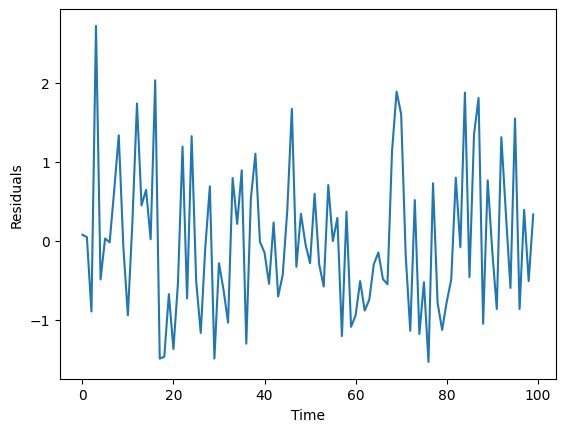

In [4]:
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')

plt.show()